In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
print(f"X_train: {X_train.shape} | y_train: {y_train.shape}")
print(f"X_test : {X_test.shape} | y_test: {y_test.shape}")

X_train: (60000, 28, 28) | y_train: (60000,)
X_test : (10000, 28, 28) | y_test: (10000,)


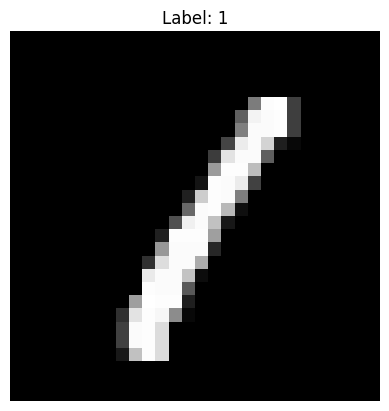

In [4]:
plt.imshow(X_train[3], cmap='gray')
plt.title(f"Label: {y_train[3]}")
plt.axis('off')
plt.show()

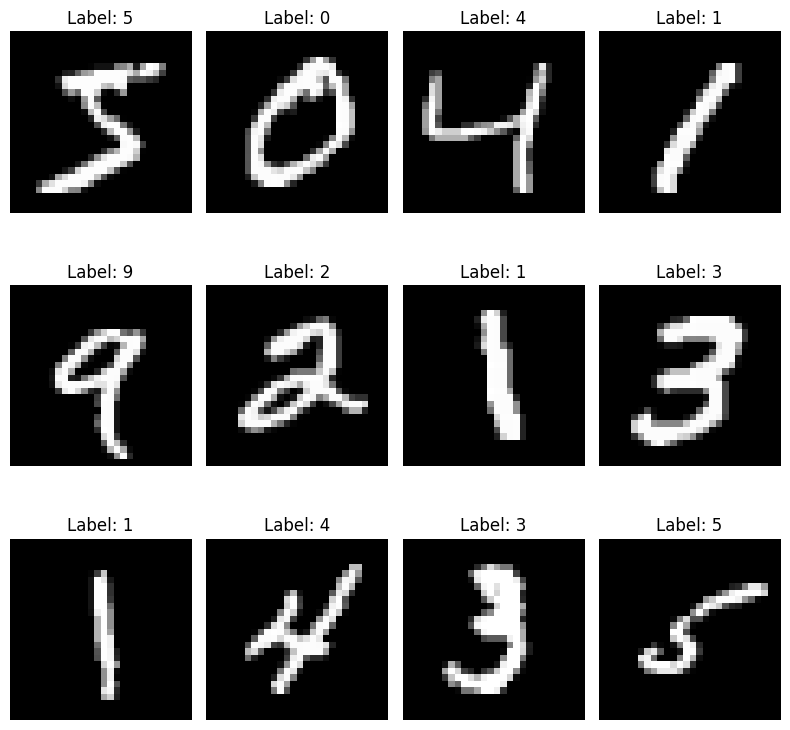

In [5]:
fig, axes = plt.subplots(3, 4, figsize=(8, 8))

for i in range(12):
    row = i // 4;
    col = i % 4;
    axes[row, col].imshow(X_train[i], cmap='gray')
    axes[row, col].set_title(f"Label: {y_train[i]}")
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

In [6]:
X_train, X_test = X_train /255.0, X_test /255.0

In [7]:
model = keras.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [10]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2773 - accuracy: 0.9186 - val_loss: 0.1497 - val_accuracy: 0.9573
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1189 - accuracy: 0.9646 - val_loss: 0.1146 - val_accuracy: 0.9653
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0826 - accuracy: 0.9746 - val_loss: 0.0956 - val_accuracy: 0.9707
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0614 - accuracy: 0.9810 - val_loss: 0.1062 - val_accuracy: 0.9683
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0475 - accuracy: 0.9849 - val_loss: 0.0949 - val_accuracy: 0.9729
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0401 - accuracy: 0.9870 - val_loss: 0.0913 - val_accuracy: 0.9747
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0928 - val_accuracy:

Text(0.5, 1.0, 'Accuracy')

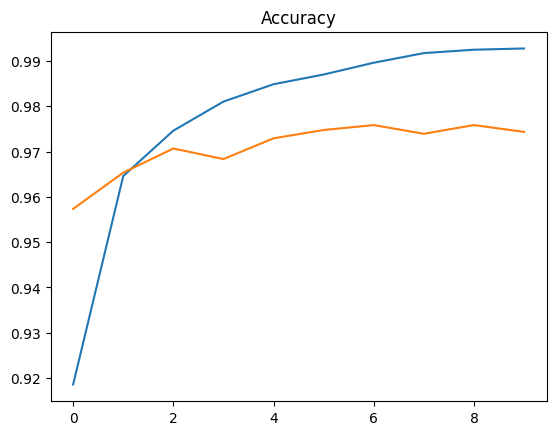

In [11]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')

Text(0.5, 1.0, 'Loss')

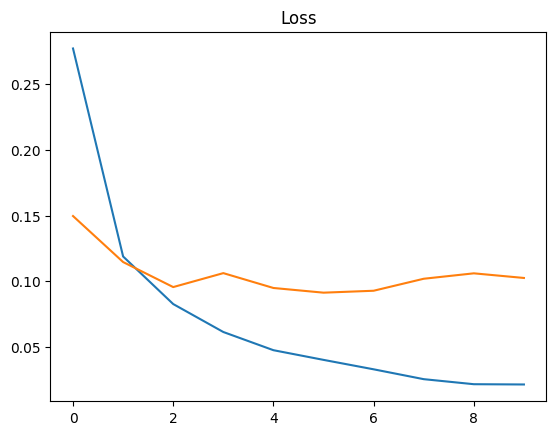

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')

In [13]:
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis=1)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

313/313 [==============================] - 1s 3ms/step


0.9758

1/1 [==============================] - 0s 110ms/step
Prediction Label: 0


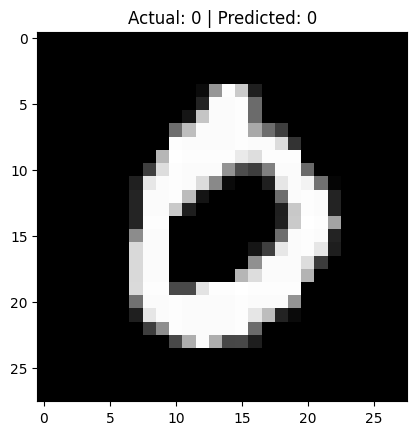

In [14]:
prediction = model.predict(X_test[3].reshape(1, 28, 28))
prediction_label = np.argmax(prediction)

print(f"Prediction Label: {prediction_label}")

plt.imshow(X_test[3], cmap='gray')
plt.title(f"Actual: {y_test[3]} | Predicted: {prediction_label}")
plt.show()